# CNN(Convolution Neural Network)
- Convolution layer(합성곱 계층)
- Pooling layer(풀링 계층)
지금까지 본 신경망은 인접하는 계층의 모든 뉴런과 결합되어 있었다. 이를 완전 연결(fully-connected)이라고 하며, 완전히 연결된 계층을 Affine계층이라는 이름으로 하였다.

> ex) 5개층 완전연결 신경망   
>> {[Affine]$→$[Relu]} $→$ {[Affine]$→$[Relu]} $→$ {[Affine]$→$[Relu]} $→$ {[Affine]$→$[Relu]} $→$ {[Affine]$→$[Softmax]}     
   
   

> CNN의 구조   
>> {[Conv]$→$[Relu]$→$[Pooling]} $→$ {[Conv]$→$[Relu]$→$[Pooling]} $→$ {[Conv]$→$[Relu]} $→$ {[Affine]$→$[Relu]} $→$ {[Affine]$→$[Softmax]}  

* CNN의 계층은 'Conv-ReLU-(Pooling)'흐름으로 연결된다.

# 완전연결 계층의 문제점
* 완전연결 계층의 가장 큰 문제점은 데이터의 형상이 무시된다는 사실이다.
* 이때까지, MNIST 데이터 셋의 경우 (1, 28, 28)을 1줄로 세운 784개의 데이터를 첫 Affine 계층에 입력하였다.
* 이미지는 3차원 형상이며, 이 형상에는 중요한 공간적 정보가 담겨져 있다. 즉 공각적으로 가까운 픽셀은 값이 비슷하거나 , RGB의 각 채널은 서로 밀접하게 관련되어 있거나, 거리가 먼 픽셀끼리는 별 연관이 없는 등, 3차원 속에서 의미를 갖는 본질적인 패턴이 숨어있다.
* **완전연결 계층은 형상을 무시하고 모든 입력 데이터를 동등한 뉴런(같은 차원의 뉴런)으로 취급하여 형상에 담긴 정보를 살릴 수 없다.**

_Convolution layer의 가장 큰 장점은 형상을 유지한다는 점이다._


# 합성곱 연산
* 일정크기의 필터 또는 커널을 일정 간격으로 이동해가며 곱셈 연산을 이에 대한 결과를 모두 총합하여 해당 픽셀 위치의 대표값으로 정한다.
* 예를 들어 4 * 4 입력데이터와 3 * 3 커널을 convolution연산하면 2 * 2의 출력 데이터가 계산된다.
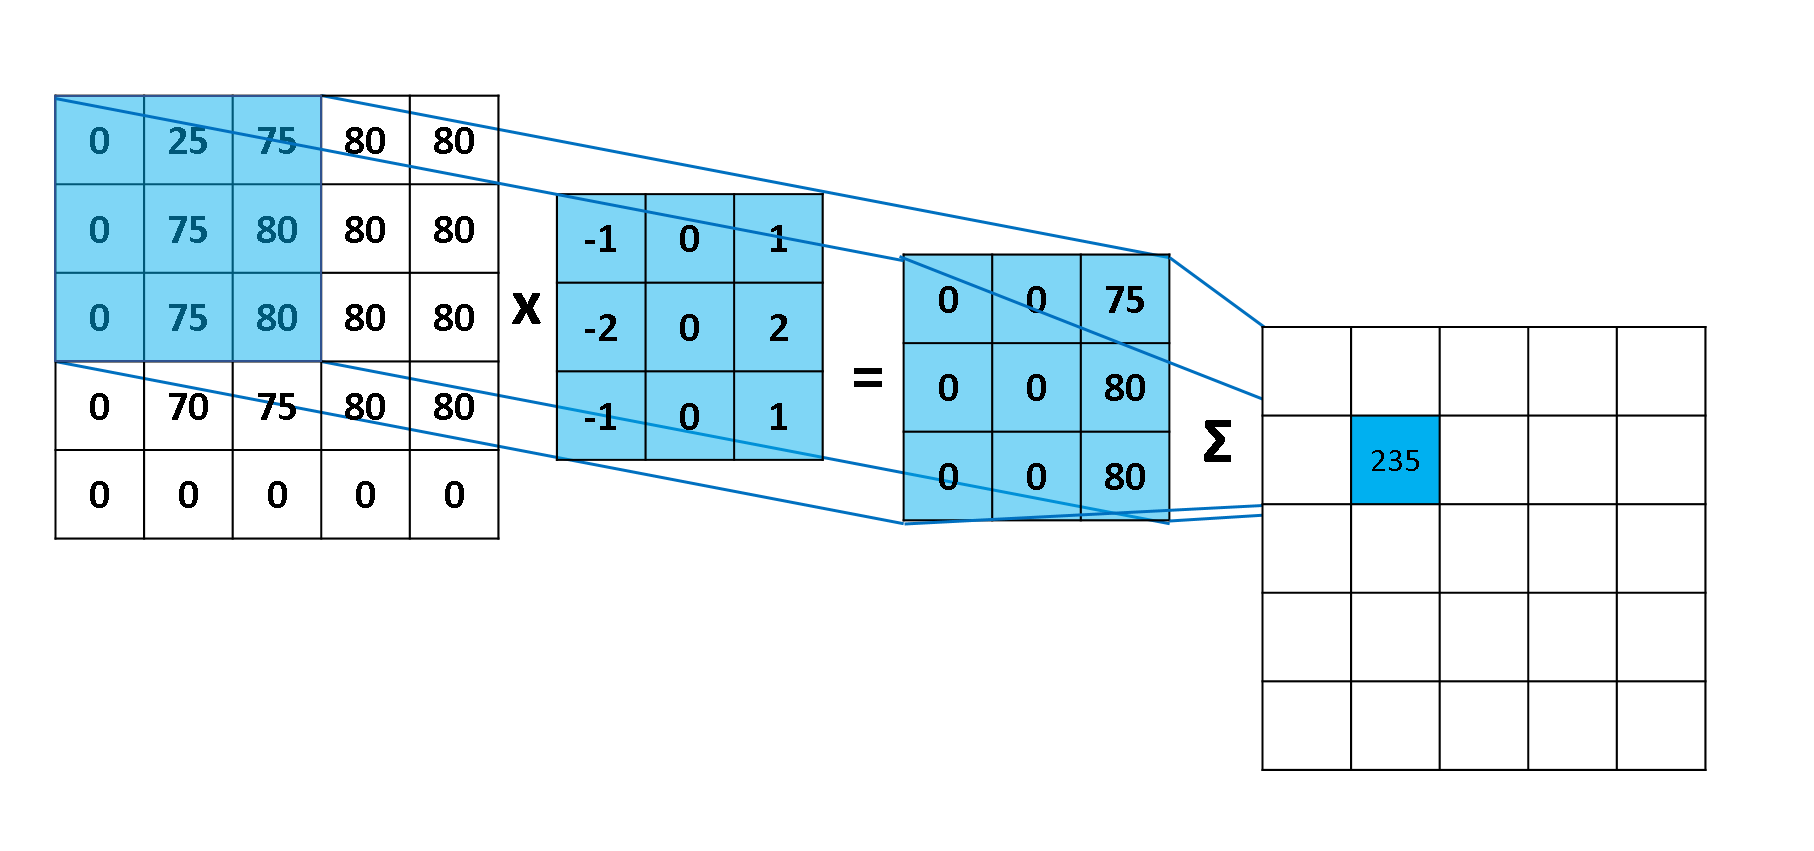

# 패딩(Padding)
* 합성곱 연산을 수행하기 전에 입력 데이터 주변을 특정값(주로 0)으로 채우는 것
* 폭이 1짜리 패딩: 입력 데이터 사방 1픽셀만큼 특정 값으로 채우는 것   
* 4 * 4의 입력데이터에 패딩1을 적용 후 3 * 3 커널 연산을 실행하면 출력 데이터의 크기는 4 * 4로 유지된다.
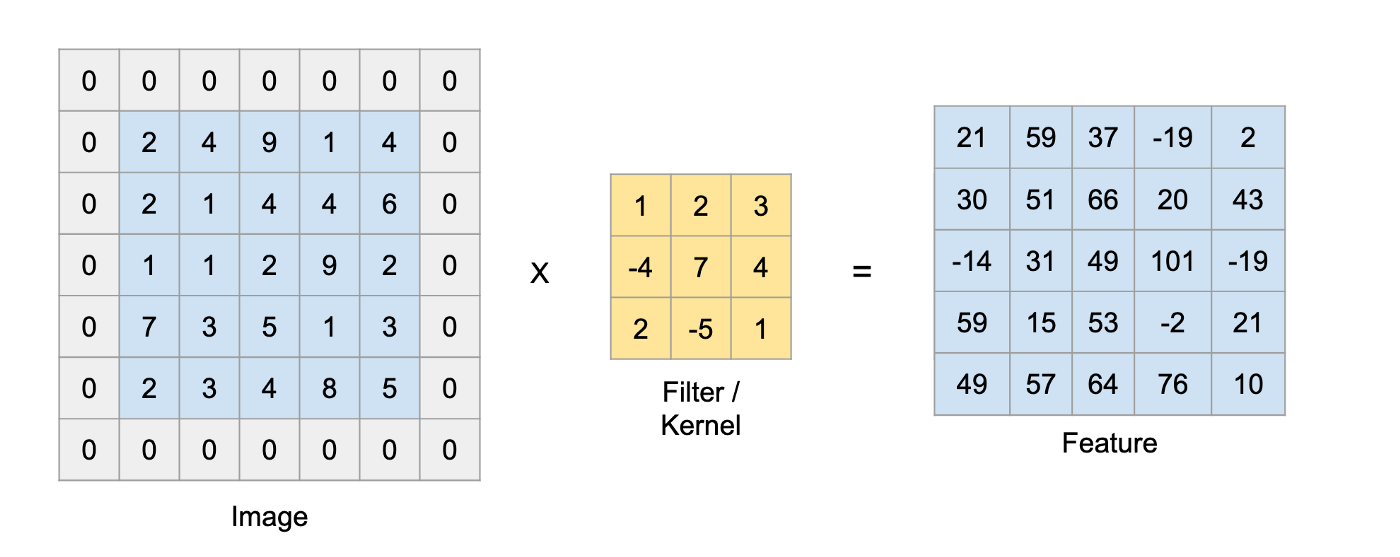

# 스트라이드(Stride)
* 필터를 적용하는 위치의 간격을 스트라이드라고 칭한다.
* 예를 들어 스트라이드를 2로 하면 필터를 적용하는 윈도우가 두 칸씩 이동한다.

```
입력크기: (H, W)
필터크기: (FH, FW)
출력크기: (OH, OW)
패딩: P
스트라이드: S 
```
> $OH = \frac{H+2P-FH}{S}+1$   
> $OW = \frac{W+2P-FW}{S}+1$    

단 위 식이 무조건 정수로 나눠 떨어져야하는 값이다. 딥러닝 프레임워크 중에는 값이 integer가 아닐 경우 반올림등의 기법을 쓰고 있음

# 3차원 데이터의 합성곱 연산
* 각 입력 채널(R, G, B)마다 필터의 합성곱 연산을 수행하고, 그 결과를 더해서 하나의 채널(1, m, n)을 얻는다.
* 3차원 합성곱 연산에서 주의할 점은 입력 데이터의 채널 수와 필터의 채널 수가 같아야 한다는 것이다.(또한, 모든 채널의 필터가 같은 크기여야 한다.)
* 만약 3채널을 합성곱 연산 후 3채널로 출력하기 위해서는 여러개의 3차원 필터를 사용하는 것이다.
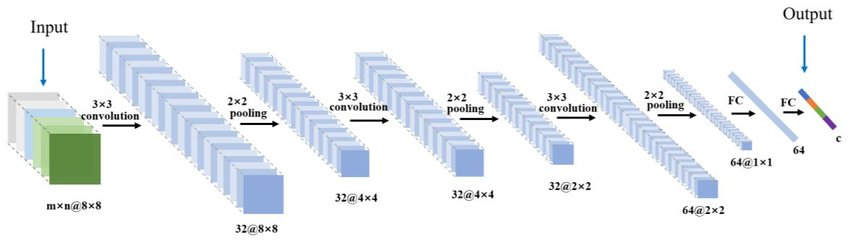

# 풀링 계층(Pooling Layer)
* 풀링은 세로*가로 방향의 공간을 줄이는 연산이다. 
* 풀링의 종류에는 최대값을 대표값으로 하는 max pooling
* 평균을 이용하는 average pooling이 있다.
max pooling은 대상 영역에서 최댓값을 취하는 연산인 반면, average pooling은 대상 영역의 평균을 계산한다. 이미지 인식 분야에서는 주로 최대 풀링을 사용한다.

## 풀링 계층의 가장 큰 특징
* 학습해야 할 매개변수가 없다.(풀링은 대상 영역에서 최댓값이나 평균을 취하는 산술적인 연산이기 때문)
* 채널 수가 변하지 않는다.(풀링 연산은 입력 데이터의 채널 수 그대로 출력데이터를 내보낸다. 채널마다 독립적으로 계산하기 때문(다만, 각 채널의 크기 자체는 줄어듦)
* 입력 변화에 영향을 적게 받는다.

In [2]:
import numpy as np
# 4차원 배열
# CNN 계층 사이를 흐르는 데이터는 4차원이다.(배치 처리를 위해서)
# 데이터의 shape이 (10, 1, 28, 28)이라면 이는 높이 28, 너비 28, 1채널인 데이터가 10개라는 의미이다.
x = np.random.rand(10, 1, 28, 28)
print(x.shape)

(10, 1, 28, 28)


In [3]:
import os
from google.colab import drive
drive.mount('/content/drive/')
%cd '/content/drive/My Drive/Colab_Notebooks'

'''
다수의 이미지를 입력받아 2차원 배열로 변환한다(평탄화).
    
    Parameters
    ----------
    input_data : 4차원 배열 형태의 입력 데이터(이미지 수, 채널 수, 높이, 너비)
    filter_h : 필터의 높이
    filter_w : 필터의 너비
    stride : 스트라이드
    pad : 패딩
    
    Returns
    -------
    col : 2차원 배열
'''

from common.util import im2col

x1 = np.random.rand(1, 3, 7, 7) # (데이터 수 , 채널 수, 높이 , 너비)
col1 = im2col(input_data=x1, filter_h=5, filter_w=5, stride=1, pad=0)
print(col1.shape)

x2 = np.random.rand(10, 3, 7, 7) # 데이터 10개
col2 = im2col(x2, 5, 5, stride=1, pad=0)
print(col2.shape)

Mounted at /content/drive/
/content/drive/My Drive/Colab_Notebooks
(9, 75)
(90, 75)


In [4]:
class Convolution:
  def __init__(self, W, b, stride=1, pad=0):
    self.W = W
    self.b = b
    self.stride = stride
    self.pad = pad

  def forward(self, x):
    FN, C, FH, FW = self.W.shape # 필터의 (갯수, 채널, 높이, 너비)
    N, C, H, W = x.shape # 입력 데이터의 shape
    out_h = int(1 + (H + 2*self.pad - FH) / self.stride)
    out_w = int(1 + (W + 2*self.pad - FW) / self.stride)

    col = im2col(x, FH, FW, self.stride, self.pad)
    col_W = self.W.reshape(FN, -1).T # 필터 전개
    out = np.dot(col, col_W) + self.b

    out = out.reshape(N, out_h, out_w, -1).transpose(0, 3, 1, 2)

    return out

In [5]:
class Pooling:
  def __init__(self, pool_h, pool_w, stride=1, pad=0):
    self.pool_h = pool_h
    self.pool_w = pool_w
    self.stride = stride
    self.pad = pad

  def forward(self, x):
    N, C, H, W = x.shape
    out_h = int(1 + (H - self.pool_h) / self.stride)
    out_w = int(1 + (W - self.pool_w) / self.stride)

    col = im2col(x, self.pool_h, self.pool_w, self.stride, self.pad)
    col = col.reshape(-1, self.pool_h * self.pool_w)

    out = np.max(col, axis=1)

    out = out.reshape(N, out_h, out_w, C).transpose(0, 3, 1, 2)

    return out

# CNN 구현하기

In [14]:
import pickle
import numpy as np
from collections import OrderedDict
from common.layers import *
from common.gradient import numerical_gradient


class SimpleConvNet:
    """단순한 합성곱 신경망
    
    conv - relu - pool - affine - relu - affine - softmax
    
    Parameters
    ----------
    input_size : 입력 크기（MNIST의 경우엔 784）
    hidden_size_list : 각 은닉층의 뉴런 수를 담은 리스트（e.g. [100, 100, 100]）
    output_size : 출력 크기（MNIST의 경우엔 10）
    activation : 활성화 함수 - 'relu' 혹은 'sigmoid'
    weight_init_std : 가중치의 표준편차 지정（e.g. 0.01）
        'relu'나 'he'로 지정하면 'He 초깃값'으로 설정
        'sigmoid'나 'xavier'로 지정하면 'Xavier 초깃값'으로 설정
    """
    def __init__(self, input_dim=(1, 28, 28), 
                 conv_param={'filter_num':30, 'filter_size':5, 'pad':0, 'stride':1},
                 hidden_size=100, output_size=10, weight_init_std=0.01):
        filter_num = conv_param['filter_num']
        filter_size = conv_param['filter_size']
        filter_pad = conv_param['pad']
        filter_stride = conv_param['stride']
        input_size = input_dim[1]
        conv_output_size = (input_size - filter_size + 2*filter_pad) / filter_stride + 1
        pool_output_size = int(filter_num * (conv_output_size/2) * (conv_output_size/2))

        # 가중치 초기화(필터)
        self.params = {}
        self.params['W1'] = weight_init_std * \
                            np.random.randn(filter_num, input_dim[0], filter_size, filter_size)
        self.params['b1'] = np.zeros(filter_num)
        self.params['W2'] = weight_init_std * \
                            np.random.randn(pool_output_size, hidden_size)
        self.params['b2'] = np.zeros(hidden_size)
        self.params['W3'] = weight_init_std * \
                            np.random.randn(hidden_size, output_size)
        self.params['b3'] = np.zeros(output_size)

        # 계층 생성
        self.layers = OrderedDict()
        self.layers['Conv1'] = Convolution(self.params['W1'], self.params['b1'],
                                           conv_param['stride'], conv_param['pad'])
        self.layers['Relu1'] = Relu()
        self.layers['Pool1'] = Pooling(pool_h=2, pool_w=2, stride=2)
        self.layers['Affine1'] = Affine(self.params['W2'], self.params['b2'])
        self.layers['Relu2'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W3'], self.params['b3'])

        self.last_layer = SoftmaxWithLoss()

    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)

        return x

    def loss(self, x, t):
        """손실 함수를 구한다.

        Parameters
        ----------
        x : 입력 데이터
        t : 정답 레이블
        """
        y = self.predict(x)
        return self.last_layer.forward(y, t)

    def accuracy(self, x, t, batch_size=100):
        if t.ndim != 1 : t = np.argmax(t, axis=1)
        
        acc = 0.0
        
        for i in range(int(x.shape[0] / batch_size)):
            tx = x[i*batch_size:(i+1)*batch_size]
            tt = t[i*batch_size:(i+1)*batch_size]
            y = self.predict(tx)
            y = np.argmax(y, axis=1)
            acc += np.sum(y == tt) 
        
        return acc / x.shape[0]

    def numerical_gradient(self, x, t):
        """기울기를 구한다（수치미분）.

        Parameters
        ----------
        x : 입력 데이터
        t : 정답 레이블

        Returns
        -------
        각 층의 기울기를 담은 사전(dictionary) 변수
            grads['W1']、grads['W2']、... 각 층의 가중치
            grads['b1']、grads['b2']、... 각 층의 편향
        """
        loss_w = lambda w: self.loss(x, t)

        grads = {}
        for idx in (1, 2, 3):
            grads['W' + str(idx)] = numerical_gradient(loss_w, self.params['W' + str(idx)])
            grads['b' + str(idx)] = numerical_gradient(loss_w, self.params['b' + str(idx)])

        return grads

    def gradient(self, x, t):
        """기울기를 구한다(오차역전파법).

        Parameters
        ----------
        x : 입력 데이터
        t : 정답 레이블

        Returns
        -------
        각 층의 기울기를 담은 사전(dictionary) 변수
            grads['W1']、grads['W2']、... 각 층의 가중치
            grads['b1']、grads['b2']、... 각 층의 편향
        """
        # forward
        self.loss(x, t)

        # backward
        dout = 1
        dout = self.last_layer.backward(dout)

        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        # 결과 저장
        grads = {}
        grads['W1'], grads['b1'] = self.layers['Conv1'].dW, self.layers['Conv1'].db
        grads['W2'], grads['b2'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grads['W3'], grads['b3'] = self.layers['Affine2'].dW, self.layers['Affine2'].db

        return grads
        
    def save_params(self, file_name="params.pkl"):
        params = {}
        for key, val in self.params.items():
            params[key] = val
        with open(file_name, 'wb') as f:
            pickle.dump(params, f)

    def load_params(self, file_name="params.pkl"):
        with open(file_name, 'rb') as f:
            params = pickle.load(f)
        for key, val in params.items():
            self.params[key] = val

        for i, key in enumerate(['Conv1', 'Affine1', 'Affine2']):
            self.layers[key].W = self.params['W' + str(i+1)]
            self.layers[key].b = self.params['b' + str(i+1)]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.trainer import Trainer

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=False)

# 시간이 오래 걸릴 경우 데이터를 줄인다.
#x_train, t_train = x_train[:5000], t_train[:5000]
#x_test, t_test = x_test[:1000], t_test[:1000]

max_epochs = 20

network = SimpleConvNet(input_dim=(1,28,28), 
                        conv_param = {'filter_num': 30, 'filter_size': 5, 'pad': 0, 'stride': 1},
                        hidden_size=100, output_size=10, weight_init_std=0.01)
                        
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=max_epochs, mini_batch_size=100,
                  optimizer='Adam', optimizer_param={'lr': 0.001},
                  evaluate_sample_num_per_epoch=1000)
trainer.train()

# 매개변수 보존
network.save_params("params.pkl")
print("Saved Network Parameters!")

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, trainer.train_acc_list, marker='o', label='train', markevery=2)
plt.plot(x, trainer.test_acc_list, marker='s', label='test', markevery=2)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
train loss:0.0019288777376686972
train loss:0.05749272416811169
train loss:0.0012496794483915024
train loss:0.014615176902673485
train loss:0.0025181844412407147
train loss:0.01586781754048029
train loss:0.013316118080190668
train loss:0.002071808298701737
train loss:0.02411928491350244
train loss:0.005784149687457626
train loss:0.004810927410049171
train loss:0.012873101822206494
train loss:0.011609776420915532
train loss:0.004616471842982607
train loss:0.012031479386603282
train loss:0.06384367409333977
train loss:0.0064371148779491915
train loss:0.002350010741646168
train loss:0.004743090673587527
train loss:0.0015305049159937483
train loss:0.006883825243648099
train loss:0.019864846679360816
train loss:0.002739480834960897
train loss:0.007818892177124427
train loss:0.004686012193169222
train loss:0.0011118427822742354
train loss:0.005588883516730818
train loss:0.02170717447416987
train loss:0.011624522452639698
train loss:0.0008244107333919986
tr